https://ome-zarr.readthedocs.io/en/stable/
https://ome-zarr.readthedocs.io/en/stable/python.html#reading-ome-ngff-images
https://ome-zarr.readthedocs.io/en/stable/api/writer.html#ome_zarr.writer.write_image

In [11]:
import matplotlib.pyplot as plt
from ome_zarr.io import parse_url
from ome_zarr.reader import Reader
from ome_zarr import writer
import zarr

# Reading Ome Zarr

In [12]:
input = "https://uk1s3.embassy.ebi.ac.uk/idr/zarr/v0.4/idr0101A/13457539.zarr"
#input = "C:/Project/slides/13457539.zarr"

In [13]:
reader = Reader(parse_url(input))
# nodes may include images, labels etc
nodes = list(reader())
# first node will be the image pixel data
image_node = nodes[0]
metadata = image_node.metadata
metadata

{'axes': [{'name': 't', 'type': 'time'},
  {'name': 'c', 'type': 'channel'},
  {'name': 'z', 'type': 'space', 'unit': 'micrometer'},
  {'name': 'y', 'type': 'space', 'unit': 'micrometer'},
  {'name': 'x', 'type': 'space', 'unit': 'micrometer'}],
 'name': ['cy 1', 'cy 2', 'cy 3', 'cy 4', 'DAPI', 'Hyb probe'],
 'coordinateTransformations': [[{'scale': [1, 1, 1, 1, 1], 'type': 'scale'}],
  [{'scale': [1, 1, 1, 2, 2], 'type': 'scale'}]],
 'visible': [True, True, True, True, True, True],
 'contrast_limits': [[0.0, 1200.0],
  [0.0, 1200.0],
  [0.0, 1200.0],
  [0.0, 1200.0],
  [0.0, 5000.0],
  [0.0, 100.0]],
 'colormap': [[[0, 0, 0], [1.0, 1.0, 1.0]],
  [[0, 0, 0], [1.0, 1.0, 1.0]],
  [[0, 0, 0], [1.0, 1.0, 1.0]],
  [[0, 0, 0], [1.0, 1.0, 1.0]],
  [[0, 0, 0], [0.0, 0.0, 1.0]],
  [[0, 0, 0], [1.0, 0.0, 0.0]]]}

In [14]:
image_data = image_node.data[0]  # resolution level 0
image_data.shape

(18, 6, 11, 189, 190)

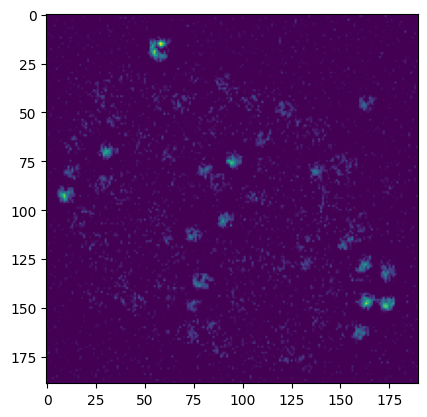

In [15]:
image = image_data[0, 0, 0, ...]
plt.imshow(image)
plt.show()

# Writing Ome Zarr

In [17]:
output = "C:/Project/slides/test.ome.zarr"

In [19]:
group = zarr.open_group(output, mode='w')
result = writer.write_image(image=image_data,
                            group=group,
                            storage_options={'dimension_separator': '/'})
result

[]